# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
visa = pd.read_csv("EasyVisa.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
data.head() # to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail() #to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

- There are 25480 rows and 12 columns in the dataset.

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations-**
* Only 3 features are numeric types (`no_of_employees`, `yr_of_estab`, `prevailing_wage`), others are non-numeric types (`case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position`, `case_status` are all object types. We will convert them to be a numeric datatype for model building purpose.)
* There are no missing values in the data.

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* Now the data of object datatype have been converted into category. The memory usage has also been decreased to 2.0 MB.

In [ ]:
#creating a for loop to check the details and unique values in the category columns
for i in cols.columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in case_id are :
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_

Observations:
- 6 continents are included in the `continent` column.
- There are 4 levels of education represented in `education_of_employee`, with Bachelor's having the highest number.
- There are boolean (yes or no) values in the `has_job_experience` and `requires_job_training` columns.
- 5 unique regions are represented in `region_of_employment`.
- For the `unit_of_wage`, the most prominent is 'year', followed by 'Hour'. This will explain the great variation in the mean,minimum, median and maximum values.
- For the `full_ime_position`, we can notice that most people are in full time positions.
- For the `case_status`, which is our target variable, most people had approvals than denials in their visa applications.

### Drop duplicates

In [ ]:
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no duplicated data in the dataset that will need to be dropped.

### Check the null values

In [ ]:
#Checking for null values in the data set
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There is no null value in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Summary of dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Observations:
- for the `no_of_employees`, the mean is 5667 while the median is 2109. This implies a right-skewed distribution. Also, the big differences between the 75% quartile and maximum implies the appearance of outliers. On the other hand, the minimum is -26, which can not be a valid number of `no_of_employees`.
- for the `yr_of_estab`, the dataset consist of companies established from 1800 to 2016.
- for the `prevailing_wage`, the mean wage is around USD 74,456 while the median is around USD$ 70308. This indicates a slightly right-skewed distribution in the dataset. The minimum wage is USD 2.1367, which doesn't appear to be a valid data point. This attribute will be investigated with `unit_of_wage` to gather further insight. The maximumn wage is USD 319210, which may need to be further studied together with `unit_of_wage` as well.

#### Fixing the negative values in `no_of_employees` columns

In [ ]:
#showing all the rows with negative values in the `no_of_employees` column
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


Observations:
- There are 33 rows that have negative values for the number of employees. We will change them to be positive values.

In [ ]:
#Changing all negative number of employees to positive
data["no_of_employees"] = (data["no_of_employees"]).abs()

In [ ]:
#checking if there are still any negative values in the column.
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


- All negative values in `no_of_employees` have been treated.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

In [ ]:
#Checking the count of each unique value in the dataset
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [ ]:
data.drop(['case_id'],axis=1,inplace=True) # drop the case_id column as it is an identifier.

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on `no_of_employees`

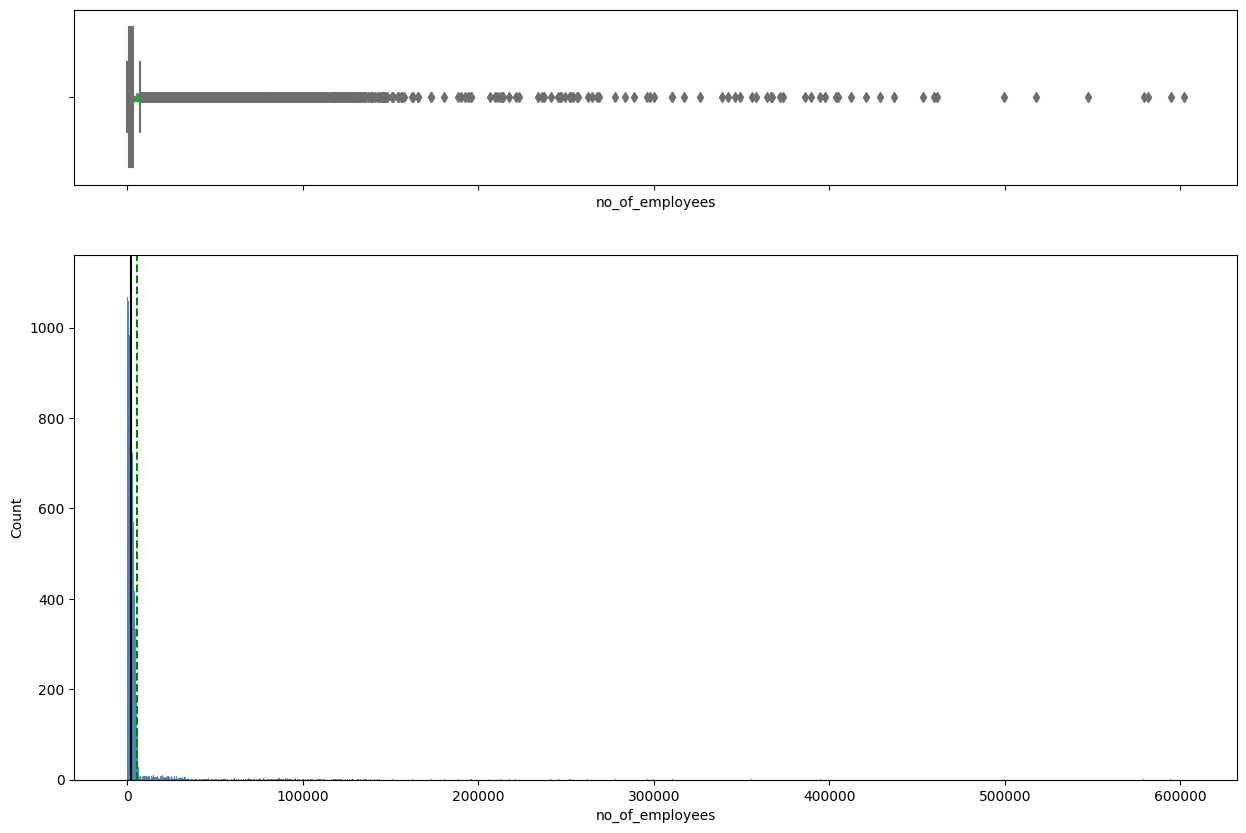

In [ ]:
histogram_boxplot(data, "no_of_employees")

Observations:
- The `no_of_employees` attribute is heavily right-skewed distributed.

#### Observations on `prevailing_wage`

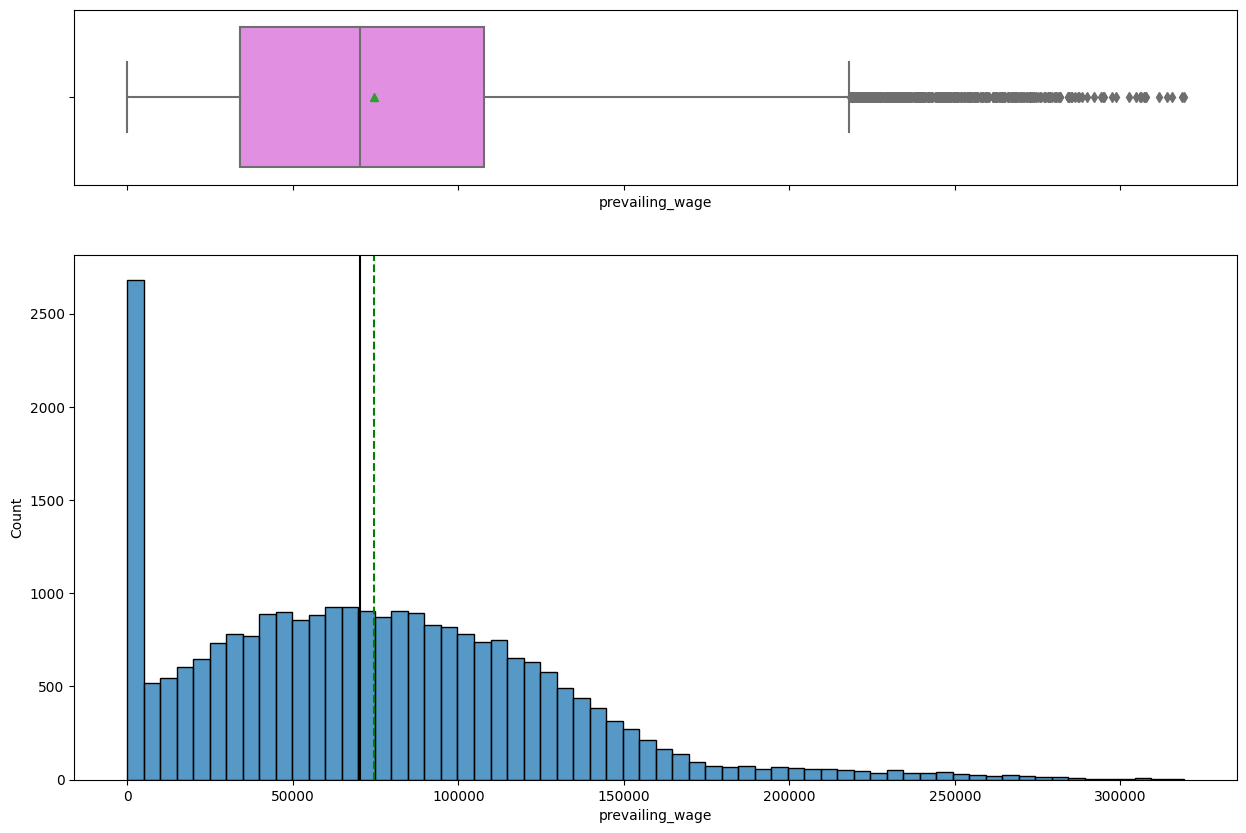

In [ ]:
histogram_boxplot(data, "prevailing_wage")

Observations:
- The distribution of `prevaling_wage` is right-skewed with the mean (74455.8) slightly larger than the median (70308.2)
- The highest count is between 0 and 100 dollars. We need to consider here that some of the values have different units (hourly,daily,weekly, monthly and yearly) when we are making any predictions or decisions concerning this variable.

In [ ]:
data.loc[data["prevailing_wage"]< 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


- There are 176 rows with `prevailing_wage` less than USD 100. We will analyse it together with `unit_of_wage` to further investigate it.

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

- We notice that all values less than USD 100 in `prevailing_wage` are hourly wage, which makes sense to be a valid data point.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

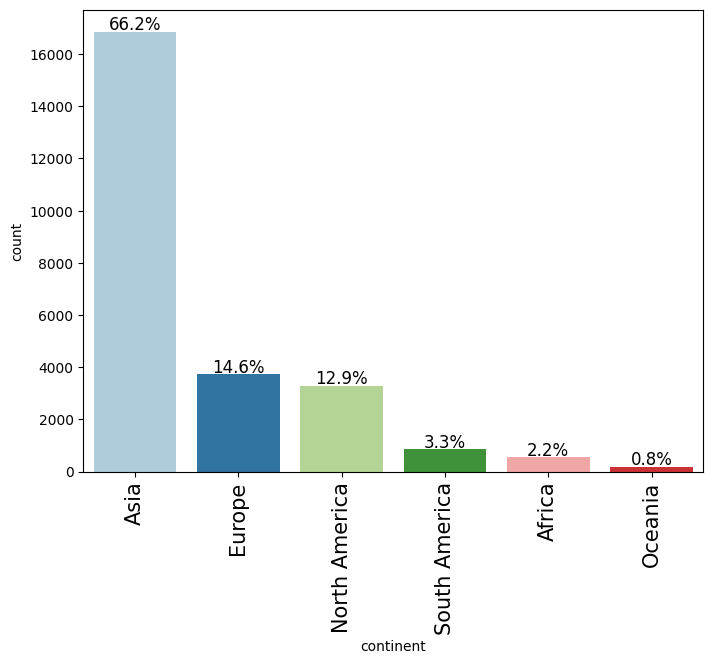

In [ ]:
#plotting the barplot for continent
labeled_barplot(data,"continent",perc=True)

Observations:
- Most of the employees are Asian, and the total percentage of asian employees is higher than the total percentage of other continents.
- Oceania has the least representation in the dataset.

#### Observations on `education_of_employee`

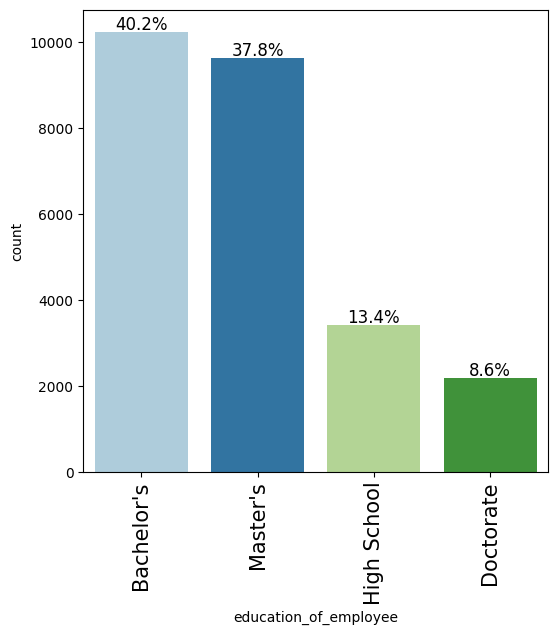

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

Obsevations:
- Most employee have Bachelor degree (40.2%), followed by the 37.8% of employee with Master degree.
- Very few number (8.6%) of employee have doctorate degree.

#### Observations on `has_job_experience`

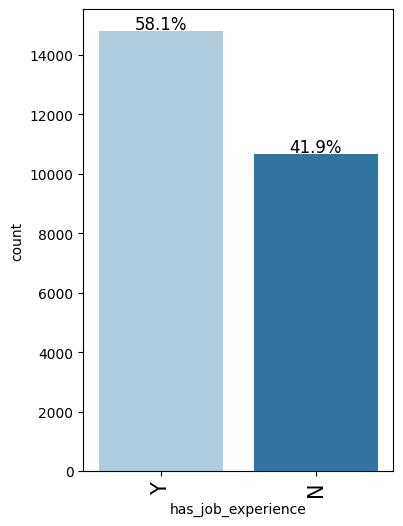

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

Observations:
- 58.1% of employee have job experience. Only 41.9% of employee have no working experience.

Observations on `requires_job_training`

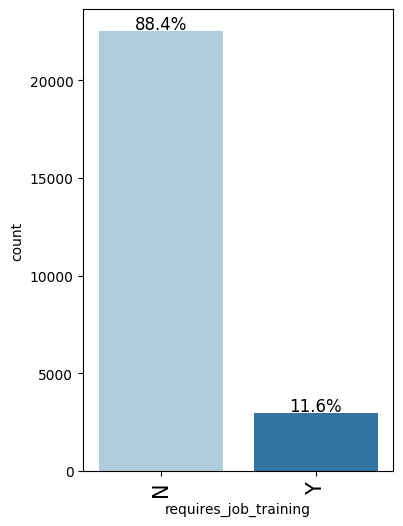

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

Observations:
- Most of the employee require job training (88.4%), while only 11.6% of employee do not require job training.
- It is very possible that it is related to the employee's educational level. With 8.6% of employee hold a doctorate qualification, it would not be surprising that 11.6% of employees do not require training.

Observations on `region_of_employment`

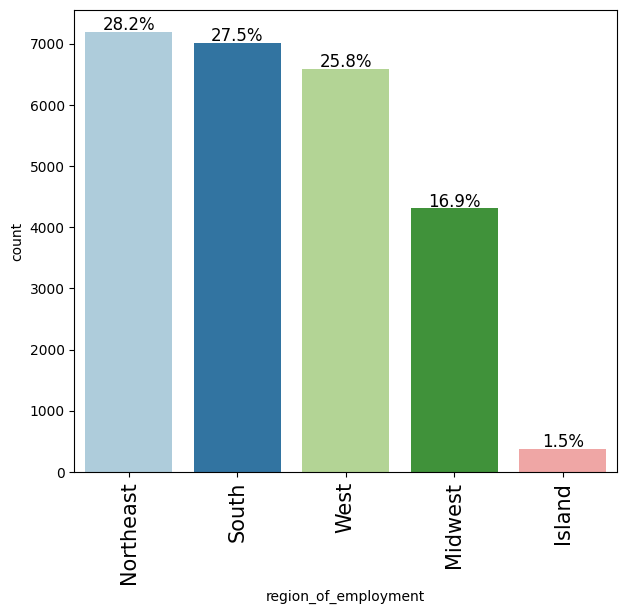

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

Observations:
- The Northeast, South and West regions are closely following each other in the percentage of employees with the Northeast region leading the pack with 28.2% employees.
- The island region has the lowest percentage of employees ((1.5%), followed by the midwest region (16.9%).


#### Observations on `unit_of_wage`

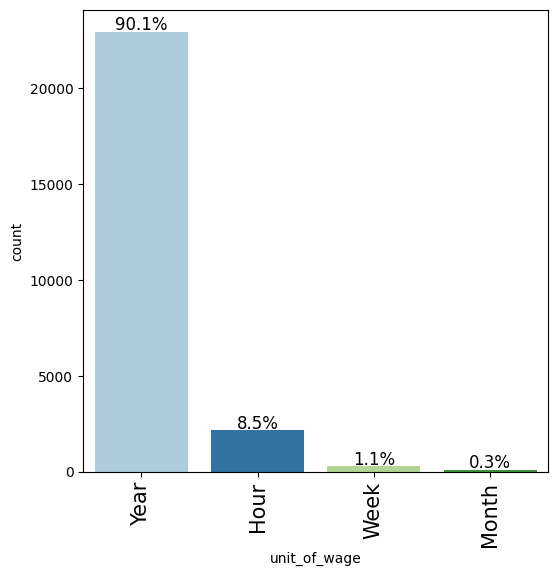

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

Observations:
- The most used unit of wage is the 'year' unit, which really explains the heavy skewness of the prevailing wage distribution.
- The 'year' unit is distantly followed by the 'hour' unit
- Only few employee use 'month' and 'week' as the unit of `prevailing_wage`

Observations on `case_status`

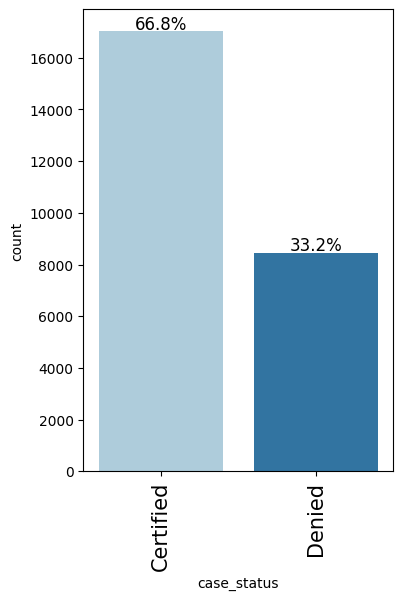

In [ ]:
labeled_barplot(data, "case_status", perc=True)

Observations:
- 66.8% of employee successfully got the approval for their visa applications, while 33.2% of employee were declined for their visa applications.

### Bivariate Analysis

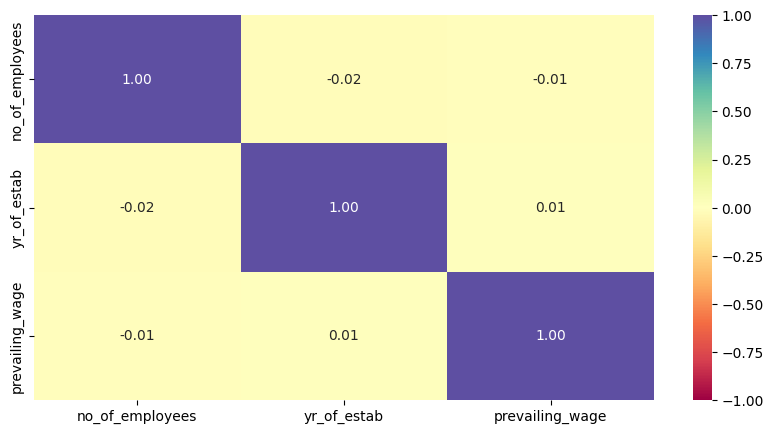

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## To find the correlation between the variables
plt.show()

Observations:
- It appears that the correlation between the 3 numeric variables:  `no_of_employees`, `yr_of_estab` and `prevailing_wage` is very weak, which is great for model building purpose.

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


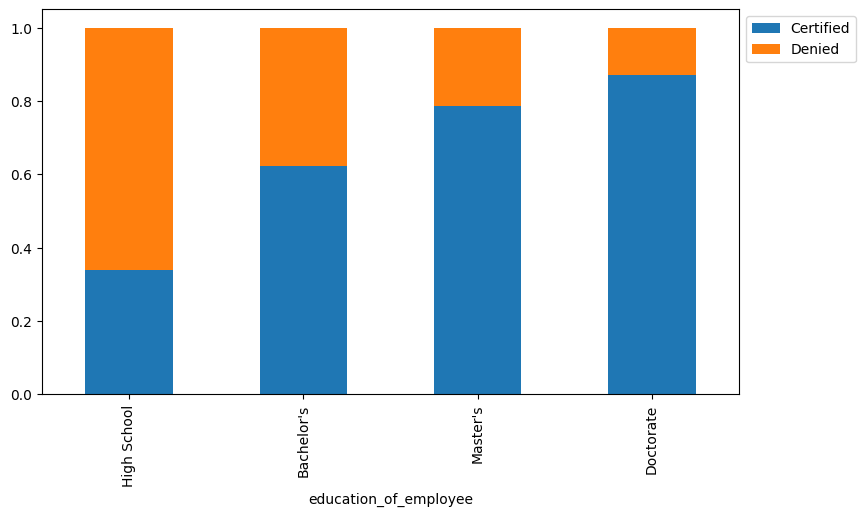

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

Observations:
- It appears that employees with a Bachelor's degree have the highest number of certified cases (6367) and denied cases (3867) compared to other education levels. This could mean that the number of certified cases and denied cases are proportional to the number of employees with a Bachelor's degree.
- Employees with a Master's degree have the highest number of certified cases (7575) compared to other education levels.
- However, employees with a High School degree have the highest number of denied cases (2256) compared to other education levels. This could mean that the number of certified cases and denied cases are proportional to the number of employees with a Master's degree and High School degree respectively.
- Employees with a doctorate degree have the highest proportion of visa approval compared to other education level. It is very possible as the companies prefer hiring those employee with professional knowledge.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

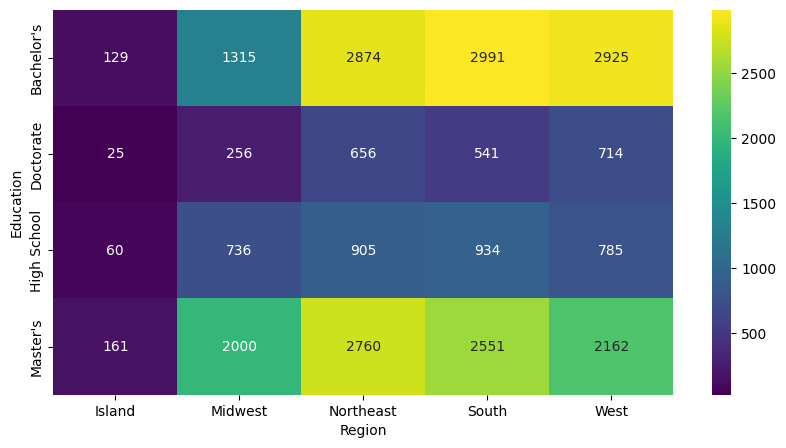

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observations:
- Employee with bachelor degree are most wanted in Northeat, South and West regions. For these 3 regions, employee with master degree are also in demand.
- We can observe that in Island region, the demand of employee from different education level is very low compared to other regions.

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


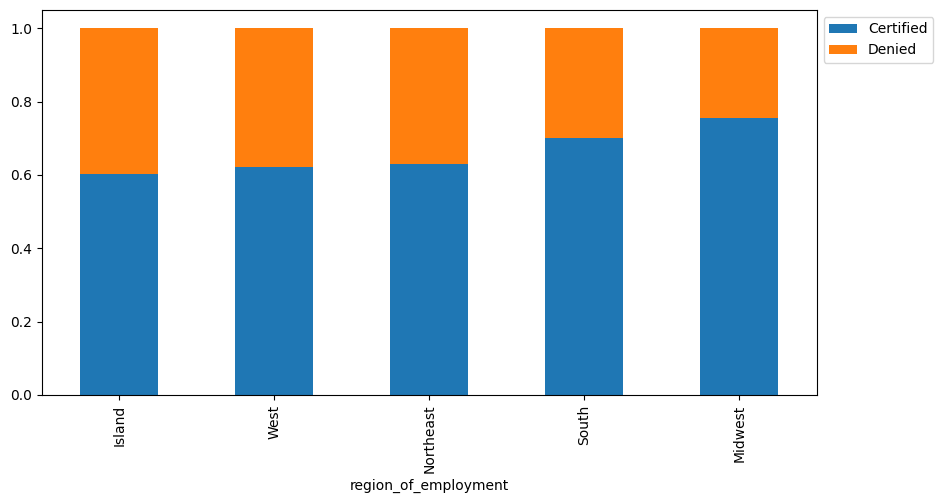

In [ ]:
#plotting the stacked barplot for education of employee and case status
stacked_barplot(data, "region_of_employment", "case_status")

Observations:
- The highest number (4913) of certified visa are in south region, followed by the Northeast region with 4526 certified case.
- The highest proportion of certified visa are from Midwest region.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


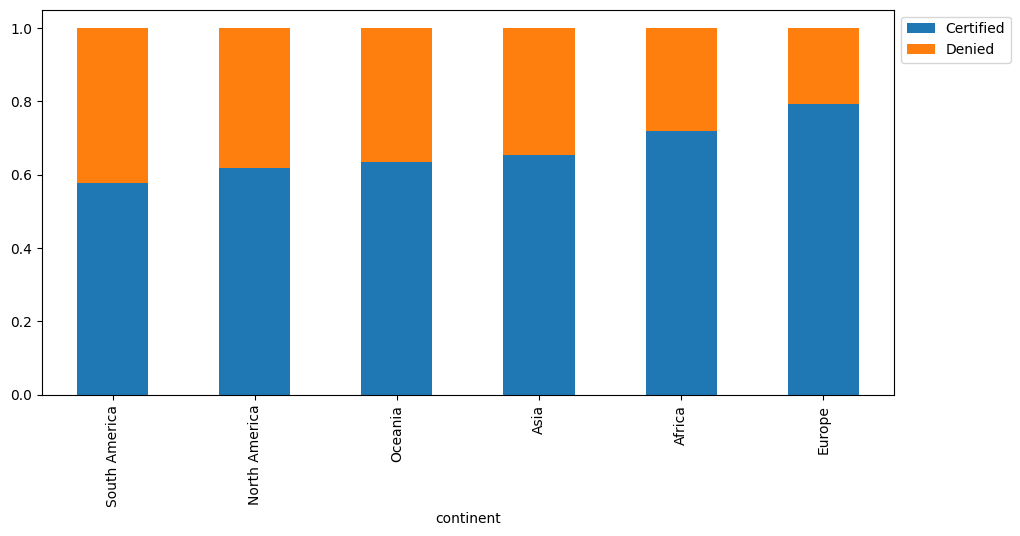

In [ ]:
stacked_barplot(data, "continent", "case_status")

Observations:
- Asia has the highest number of visa applications (both certified - 11012 and denied - 5849) compared to other continents.
- Africa (551) and Oceania (192) have the lowest number of visa applications.
- Asia, Europe, and North America have a relatively higher number of denied cases compared to other continents.
- The highest percentage of approved visa applications are from Europe.
- South America and Africa have a lower number of denied cases compared to other continents.
- The lowest percentage of approved visa applications are from South America.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


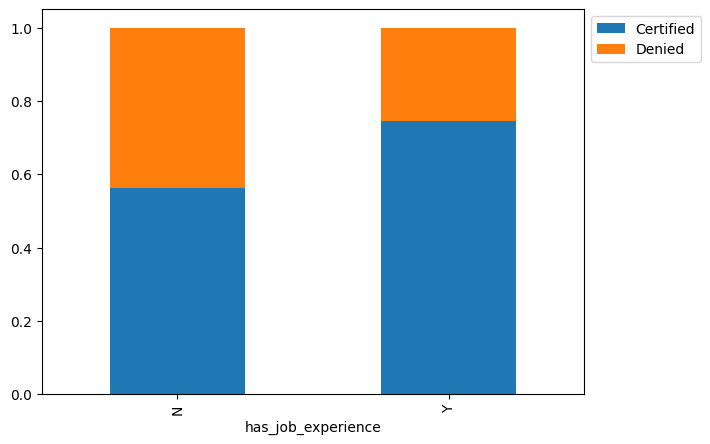

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

Observations:
- Applicants with job experience (Y) have a higher visa approval rate of approximately 74.42%.
- Applicants without job experience (N) have a lower visa approval rate of approximately 56.17%.

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


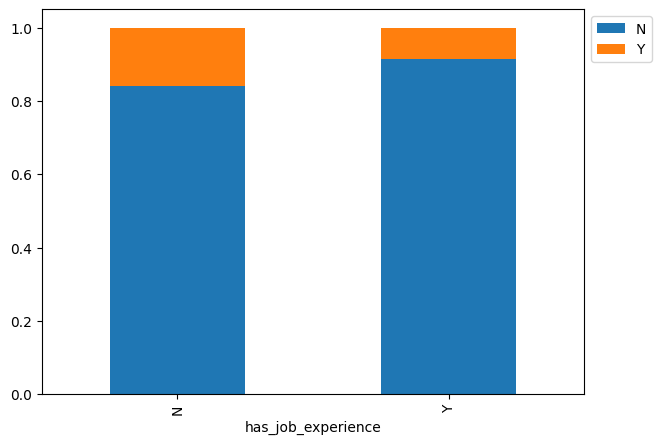

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

Observations:
- Among employees who do not have job experience (N), approximately 15.83% of them require job training.
- Among employees who have job experience (Y), approximately 8.55% of them require job training.
- Based on this analysis, it appears that employees with prior work experience generally have a lower percentage of individuals requiring job training compared to those without prior work experience.
- This suggests that prior work experience might contribute to a reduced need for job training, as these individuals may already possess the necessary skills and knowledge from their previous roles.
- However, it's important to note that there are still some employees with job experience who require training, albeit at a lower percentage compared to those without experience.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

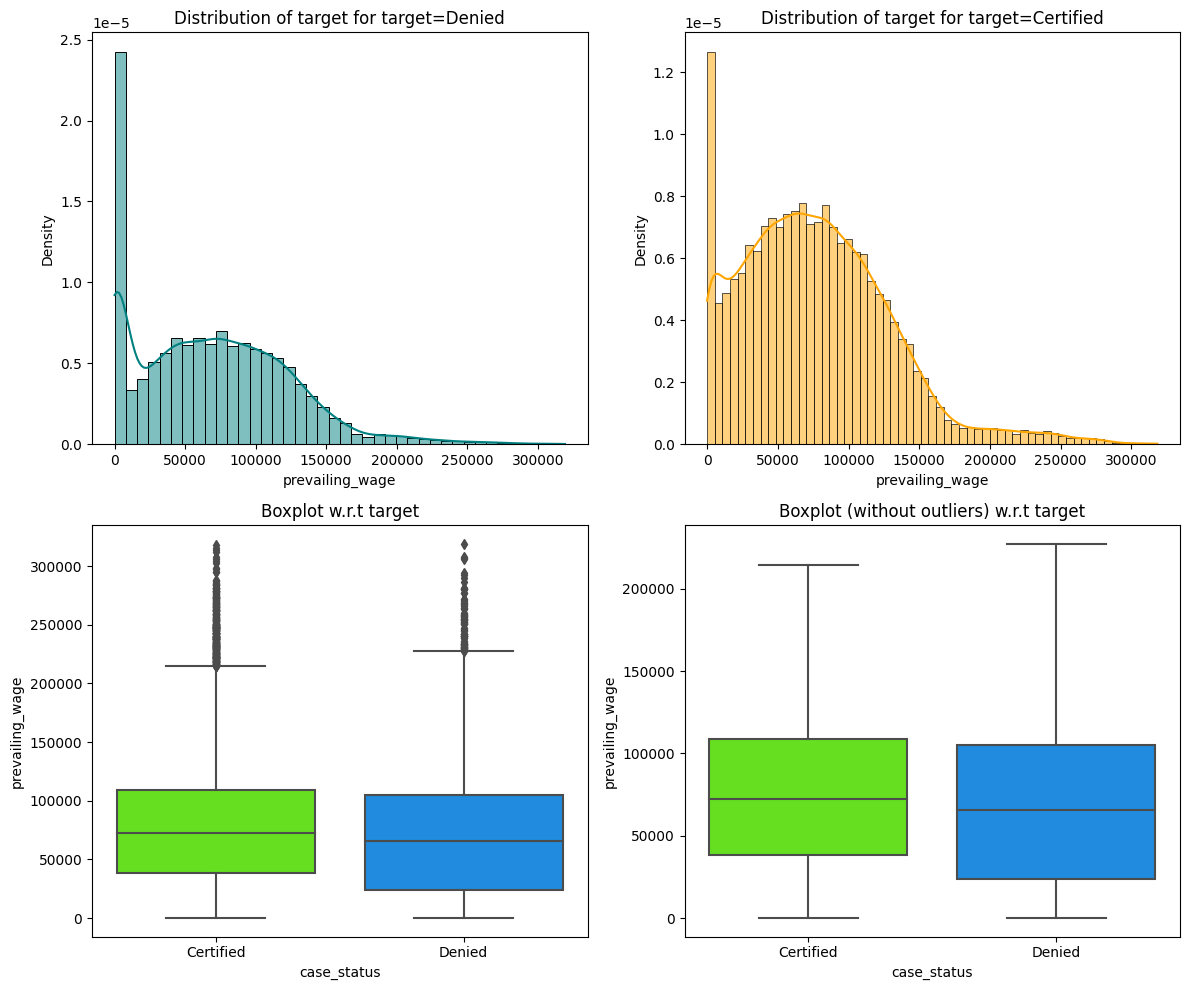

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Observations:
- Similar patterns can be noticed in the distribution of case status and prevailing wage among the employees.
- However, a notable distinction between the two is the considerably higher density of denials for prevailing wage within the range of 0 to 100.
- The boxplot of prevailing wage concerning case status shows that the median prevailing wage for certified employees is slightly higher.
- Excluding outliers and examining the boxplot reveals that the maximum prevailing wage among denied employees is higher compared to those who were certified.

#### Checking if the prevailing wage is similar across all the regions of the US

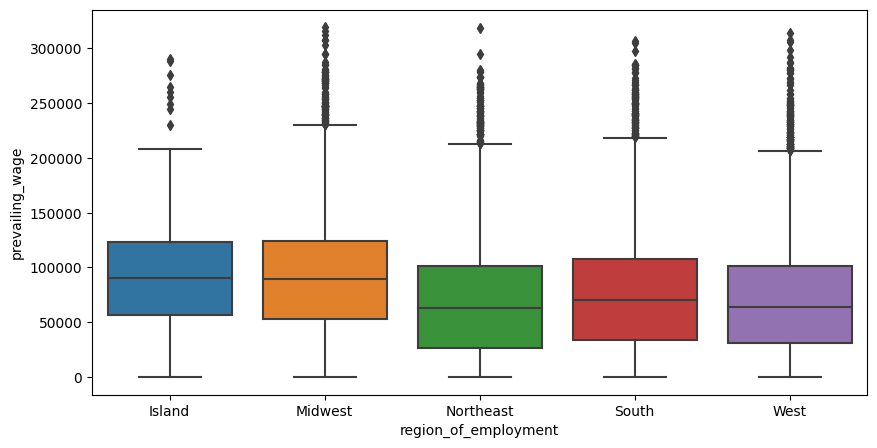

In [ ]:
#Creating the boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot (data= data, x= 'region_of_employment', y= 'prevailing_wage')
plt.show()

Observations:
- Based on the box plots, we observe that the island and midwest regions exhibit higher prevailing wages in the 75th percentile compared to other regions.
- On the contrary, the Northeast and West regions of employment have the lowest prevailing wages, while the South region falls somewhere in between.
- Notably, the Northeast and Midwest regions demonstrate the highest maximum prevailing wages among all the regions.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


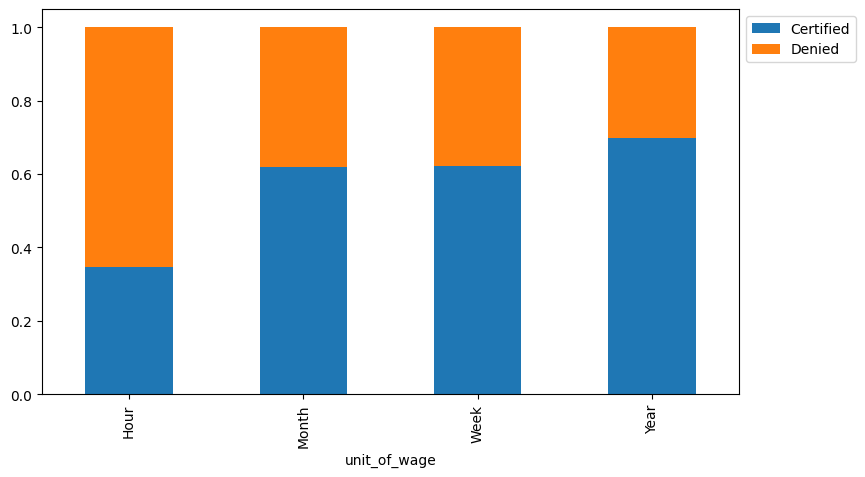

In [ ]:
#plotting the stacked barplot for unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:
- Applicants with prevailing wage unit "Year" have the highest visa certification rate of approximately 69.98%.
- Applicants with prevailing wage unit "Hour" have the lowest visa certification rate of approximately 34.65%.
- Applicants with prevailing wage units "Week" and "Month" have relatively higher visa certification rates of approximately 62.13% and 61.80%, respectively.
- Based on this analysis, it appears that the unit of prevailing wage does have an impact on visa applications getting certified. Applicants with prevailing wages represented in "Year" have a higher certification rate compared to those with wages represented in "Hour." The certification rates for "Week" and "Month" are also higher than those represented in "Hour," but slightly lower than "Year."
- This suggests that the unit of wage representation might influence the visa certification outcome, with "Year" being associated with higher chances of certification.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

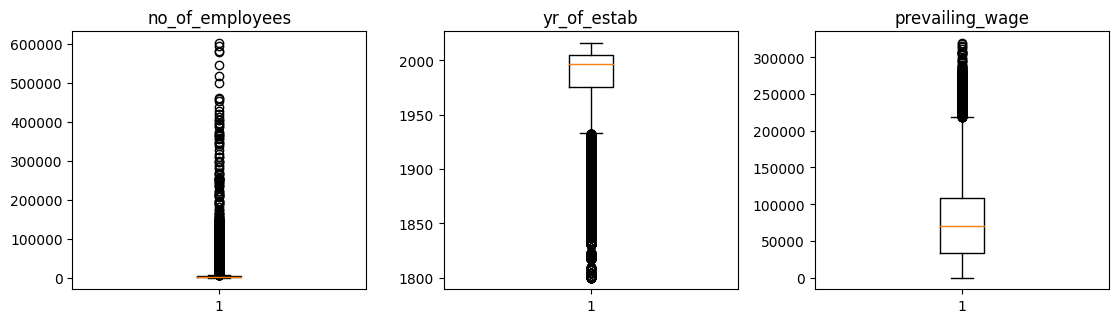

In [ ]:
#Checking for outliers in the dataset using boxplot

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
- We have observed that all three numerical variables in the dataset contain outliers. However, we have decided not to treat these outliers for the following reasons:

1. Regarding the number of employees, it is common for companies to have a wide range of employee counts based on the type of business they operate. It is not unusual to find companies with thousands of employees, especially those that have been established for a significant period. Thus, we believe these outliers carry valuable information and should not be treated.

2. The year of establishment also exhibits outliers, with some companies being over 200 years old. This can be explained by the fact that some businesses have been passed down through generations, while others are newly established. We consider these outliers to be meaningful and representative of the historical nature of certain companies, so we will not treat them.

3. As for the prevailing wage, the recording does not include the unit of wages. Treating outliers in this column might lead to a loss of essential information, especially since prevailing wages can vary significantly based on factors such as industry or the level of education. Hence, we have chosen not to treat the outliers in this variable to maintain data integrity and comprehensiveness.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
# check data has no missing values as required
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# take a look at how data looks like now
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.dtypes

continent                category
education_of_employee    category
has_job_experience       category
requires_job_training    category
no_of_employees             int64
yr_of_estab                 int64
region_of_employment     category
prevailing_wage           float64
unit_of_wage             category
full_time_position       category
case_status              category
dtype: object

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
#Encoding the values in the target variable
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

#defining the dependent and independent variables
X = data.drop(['case_status'], axis=1)
Y = data["case_status"]


#getting dummies for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied, a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified, the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
#fitting the decision tree on training data
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

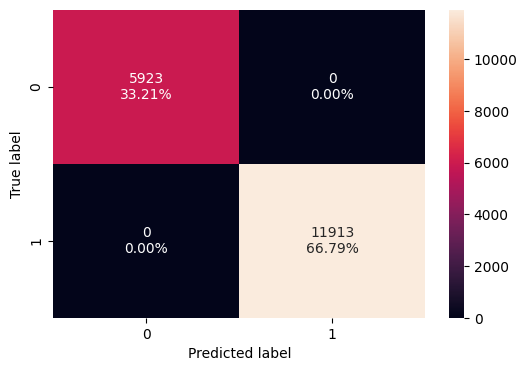

In [ ]:
#Checking performance on the training set
#creating the confusion matrix for the training set
confusion_matrix_sklearn(decision_tree,X_train,y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(decision_tree,X_train,y_train) ## check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

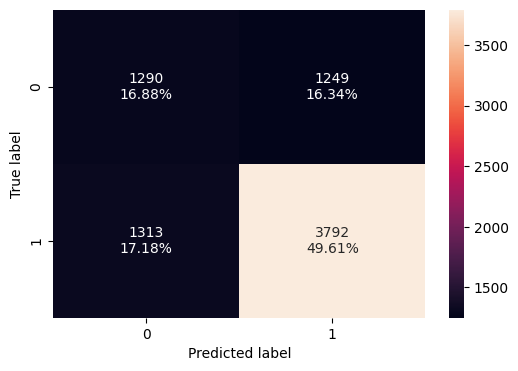

In [ ]:
#Checking performance on the test set
#creating the confusion matrix for the test set
confusion_matrix_sklearn(decision_tree,X_test,y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(decision_tree,X_test,y_test) ## check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


Observations from the decision tree Model:

- In the training data of this model, there are signs of overfitting (Accuracy, Recall, Precision, F1 are all 1.0), which is evident from its poor performance on the test set in terms of accuracy.
- For the test set, the F1 score has been calculated as 0.74.
- In the next section, we plan to explore hyperparameter tuning to potentially improve the model's performance.

### Hyperparameter Tuning - Decision Tree

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1) #run grid search with n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=5,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=3, random_state=1)

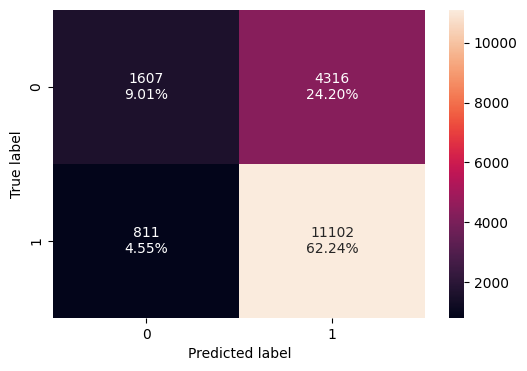

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_train,y_train) # create confusion matrix for train data on tuned estimator

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train,y_train) ## check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator,X_test,y_test) ## check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


Observations:
- The hyperparameter tuned decision tree is not overfiting the dataset, as well the `F1 score` has improved.
- `F1 score` for both the train and test datasets are 0.812 & 0.809 respectively

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
#Building the bagging classifier
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

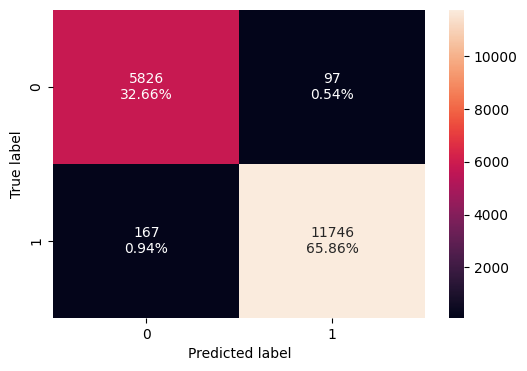

In [ ]:
#Getting the confusion matrix for the training data
confusion_matrix_sklearn(bagging_estimator,X_train,y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_estimator,X_train,y_train) ## check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

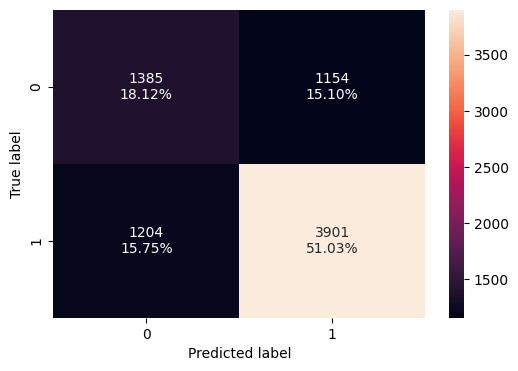

In [ ]:
#Getting the confusion matrix for the test data
confusion_matrix_sklearn(bagging_estimator,X_test,y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_estimator,X_test,y_test) ## check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


Observations:

- There are some overfitting in the training model with the Accuracy, Recall, Precision, F1 near 0.99.
- The `F1 score` for the testing set is 0.77.
- since there are some overfitting in the model, so we will try hyperparameter tuning to see if we get better performance in terms of fitting and stability.

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5) #run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

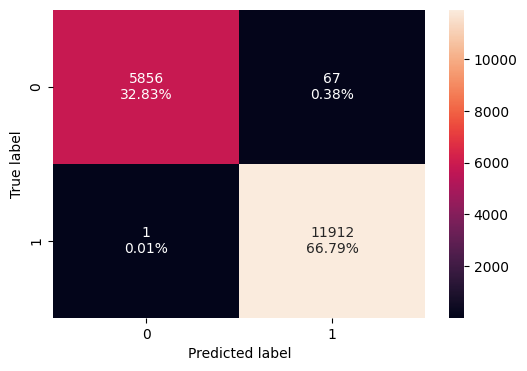

In [ ]:
#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train) ## check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Checking model performance on test set

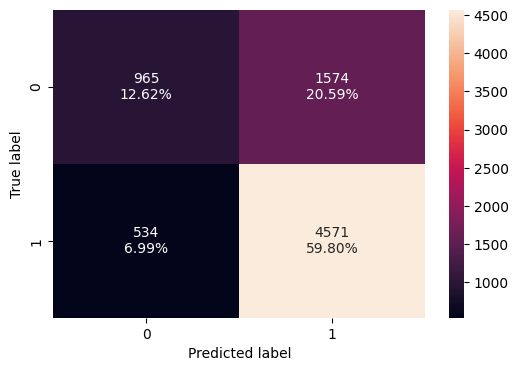

In [ ]:
#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test) ## check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


Observations:
- The model is still found to overfit the training data, as the training metrics are high but the testing metrics are not.

### Random Forest

In [ ]:
#Building a random forest model
#Train the random forest classifier
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

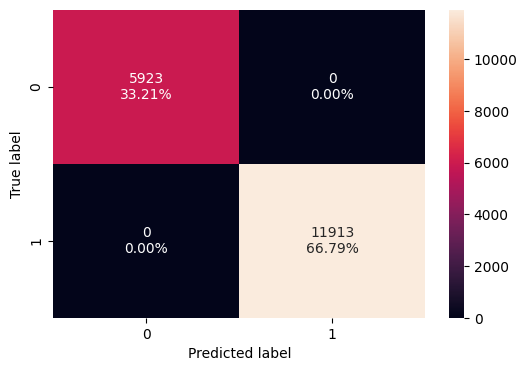

In [ ]:
# create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator,X_train,y_train)

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train,y_train) ## check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

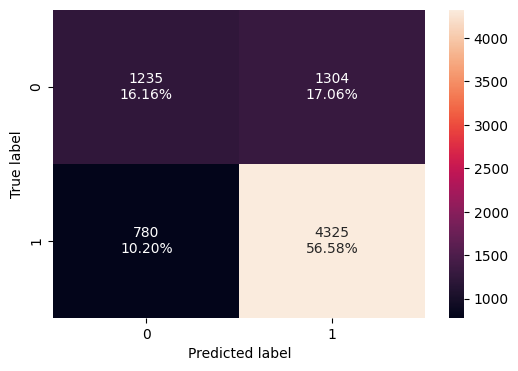

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [ ]:
# Calculating different metrics
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) ## check performance on test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


Observations:

- We can observe little overfitting in the model, though the `F1 score` in this model is good at 0.80.
- We will try hyperparameter tuning to see if we get can get a better performance.

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1) ## run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

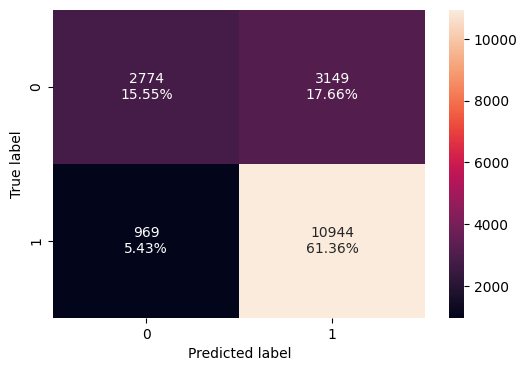

In [ ]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train) ## check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on test set

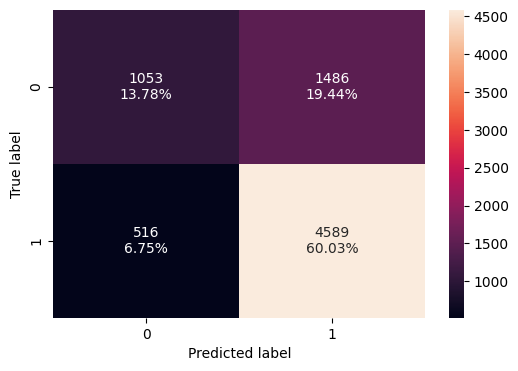

In [ ]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


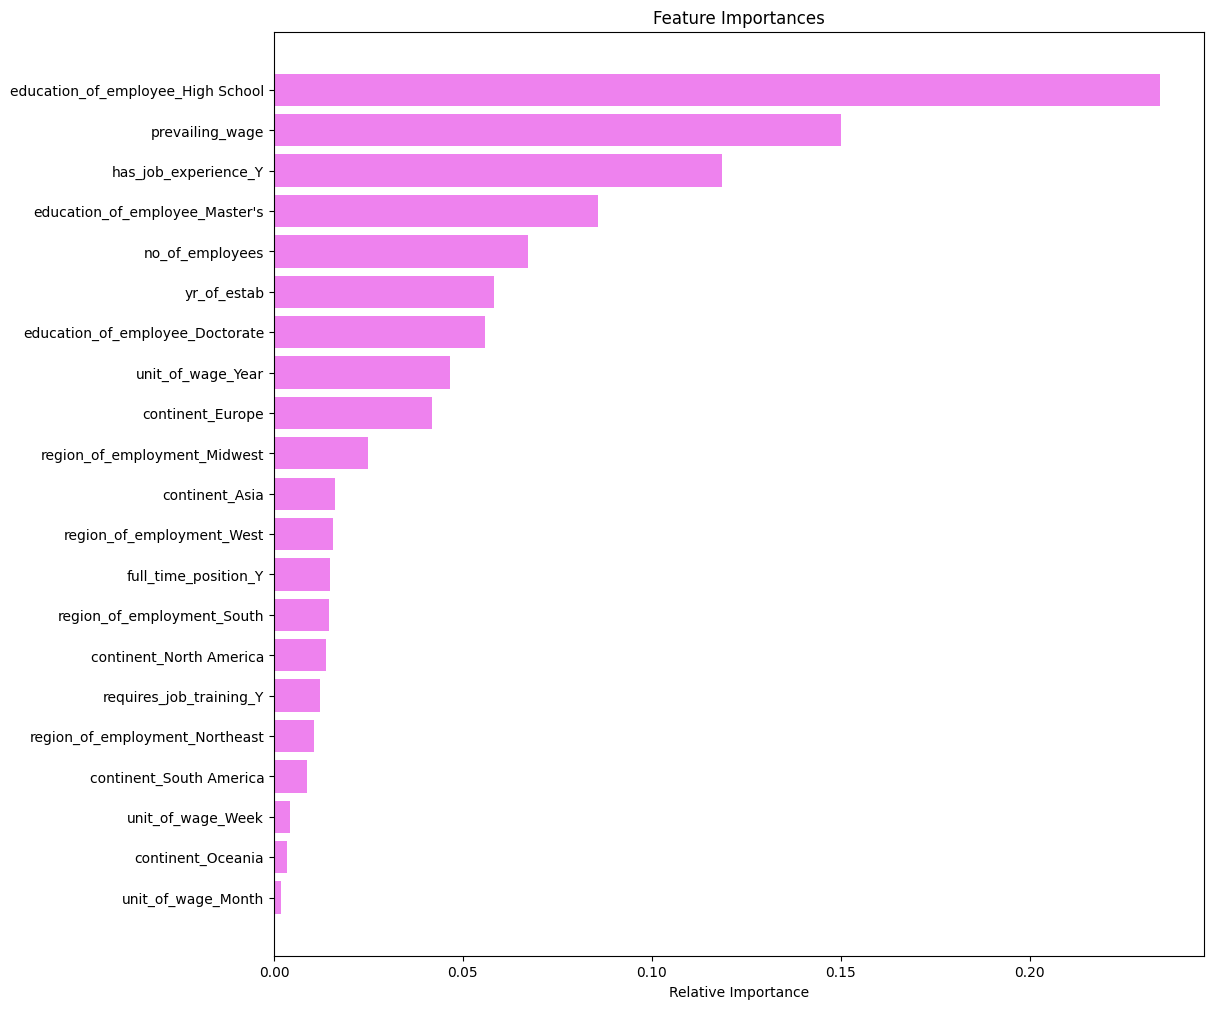

In [ ]:
#Checking the important features for this model
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
- Hyperparameter tuning has decreased the overfit and increased `F1 score`.
- however, this model is not performing as optimally as the hyperparameter tuned decision tree.
- The most important feature of this tuned mmodel is `education_of_employee`.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1) ## define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

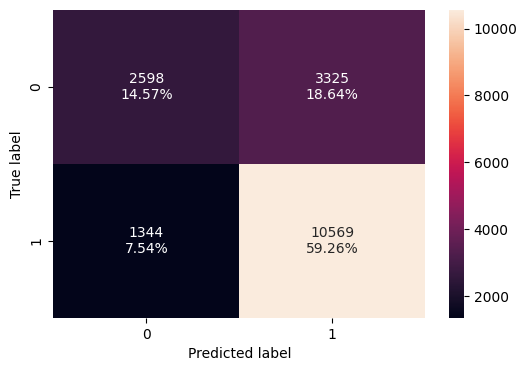

In [ ]:
# create confusion matrix for train data
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) ##check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

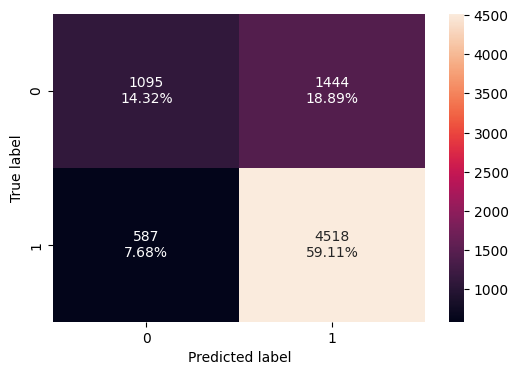

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) ## check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


Observations:

- This model demonstrates good fitting and stability, with an `F1 score` performing well at around 0.82.
- Additionally, it exhibits excellent recall, accuracy, and precision scores. - - Despite its current performance, we will explore hyperparameter tuning to see if further improvements can be achieved and potentially obtain an even better model.

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

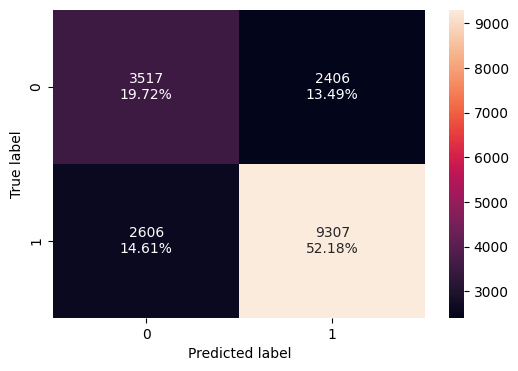

In [ ]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) ## check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set

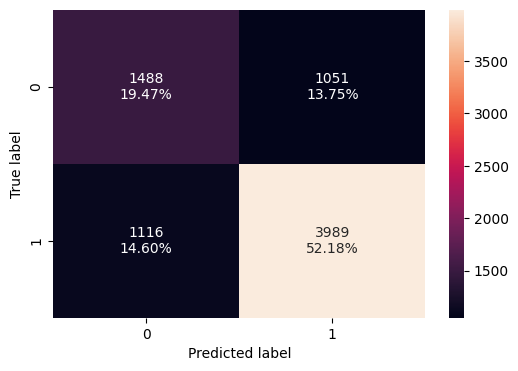

In [ ]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) ## check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


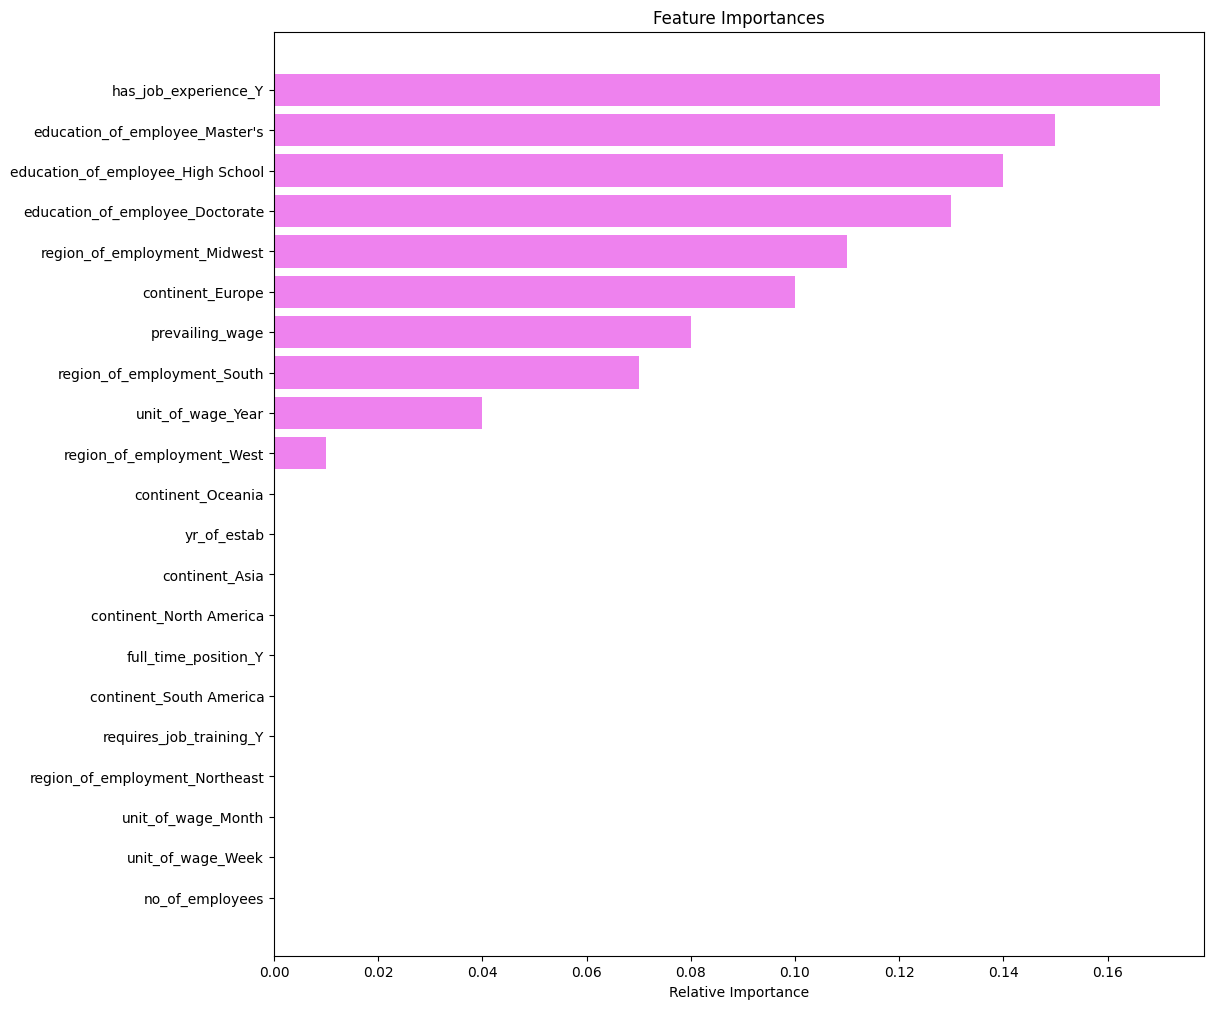

In [ ]:
#Checking the important features of the model
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:
- The hyperparameter tuned model is giving similar performance to the default AdaBoost model with the `F1 score` decrease a bit from ~ 0.82 to ~ 0.79.
- The most import feature of this tuned model is `has_job_experience`.

### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1) ## define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train,y_train) ## fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

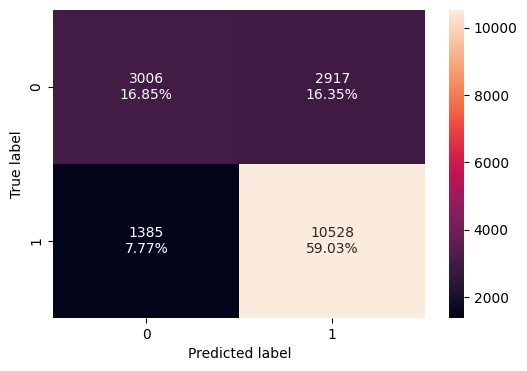

In [ ]:
# create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) ## check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on test set

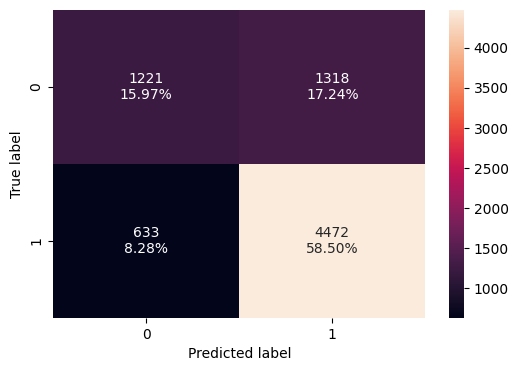

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


Observations:
- The gradient boosting model is giving generalized performance on both the training and testing data with very high `F1 scores` of 0.83 and 0.821 respectively.
- This indicates that the model is generalizing well and is effective in capturing patterns and making accurate predictions on new data.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

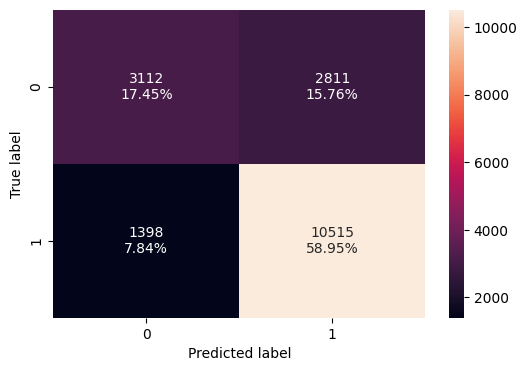

In [ ]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) ## check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

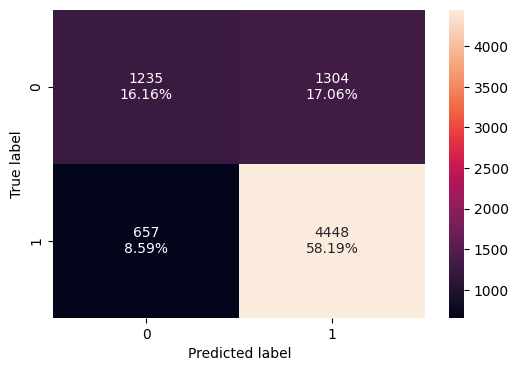

In [ ]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) ## check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


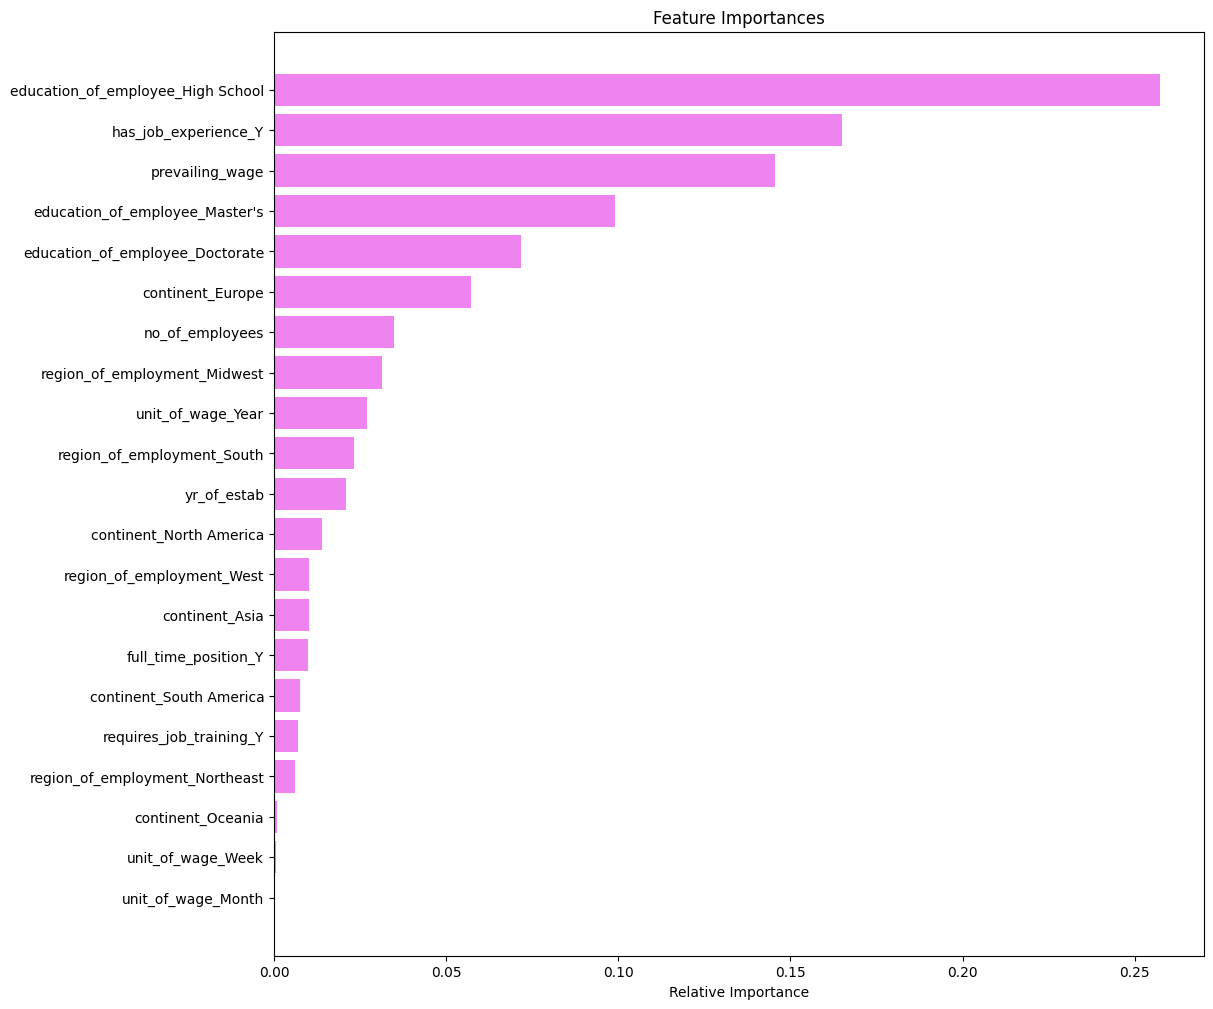

In [ ]:
# Checking the important features
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:
- There is not much difference in the model performance after hyperparameter tuning.
- The most impotant feature of this model is `education_of_employee`.

### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss') ## define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train,y_train) ## fit XGBoost Classifier on the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

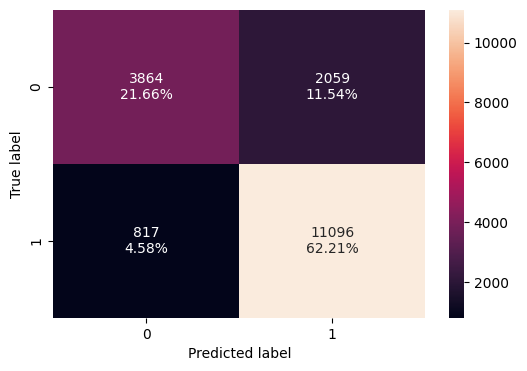

In [ ]:
# create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) ## check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


#### Checking model performance on test set

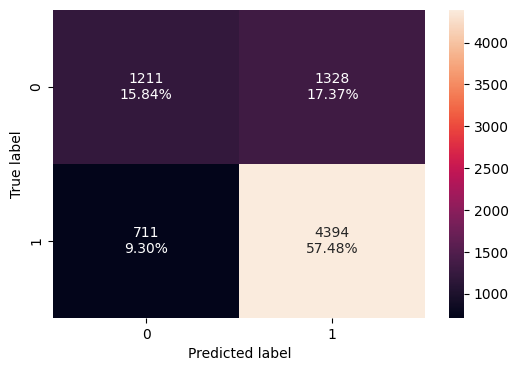

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) ## check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


Observations:

- This model has a good performance.
- For the test set ,the `F1 score` performs well at 0.81.
- The model is stable but it's not the best in stability out of the models built so far.

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from with limited options
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "learning_rate": [0.1, 0.2],
    "colsample_bytree": [0.8, 0.9],
    "subsample": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search with cross-validation
random_search = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
random_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

# Use the best hyperparameters over the entire dataset
xgb_tuned = XGBClassifier(**best_params, random_state=1, eval_metric="logloss")
xgb_tuned.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

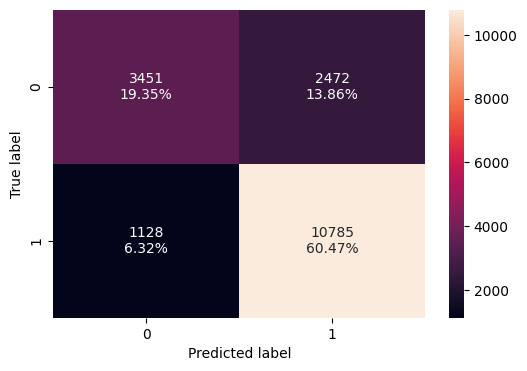

In [ ]:
# create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) ## check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.798161,0.905314,0.813532,0.856973


#### Checking model performance on test set

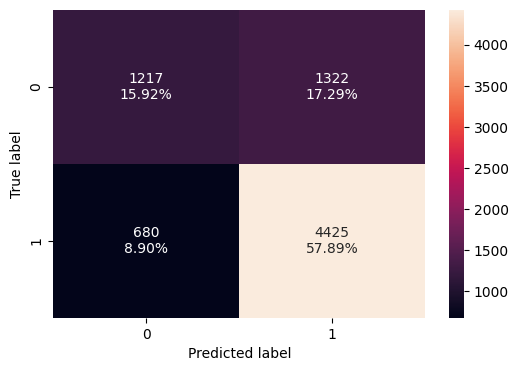

In [ ]:
# create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test) ## check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.866797,0.769967,0.815518


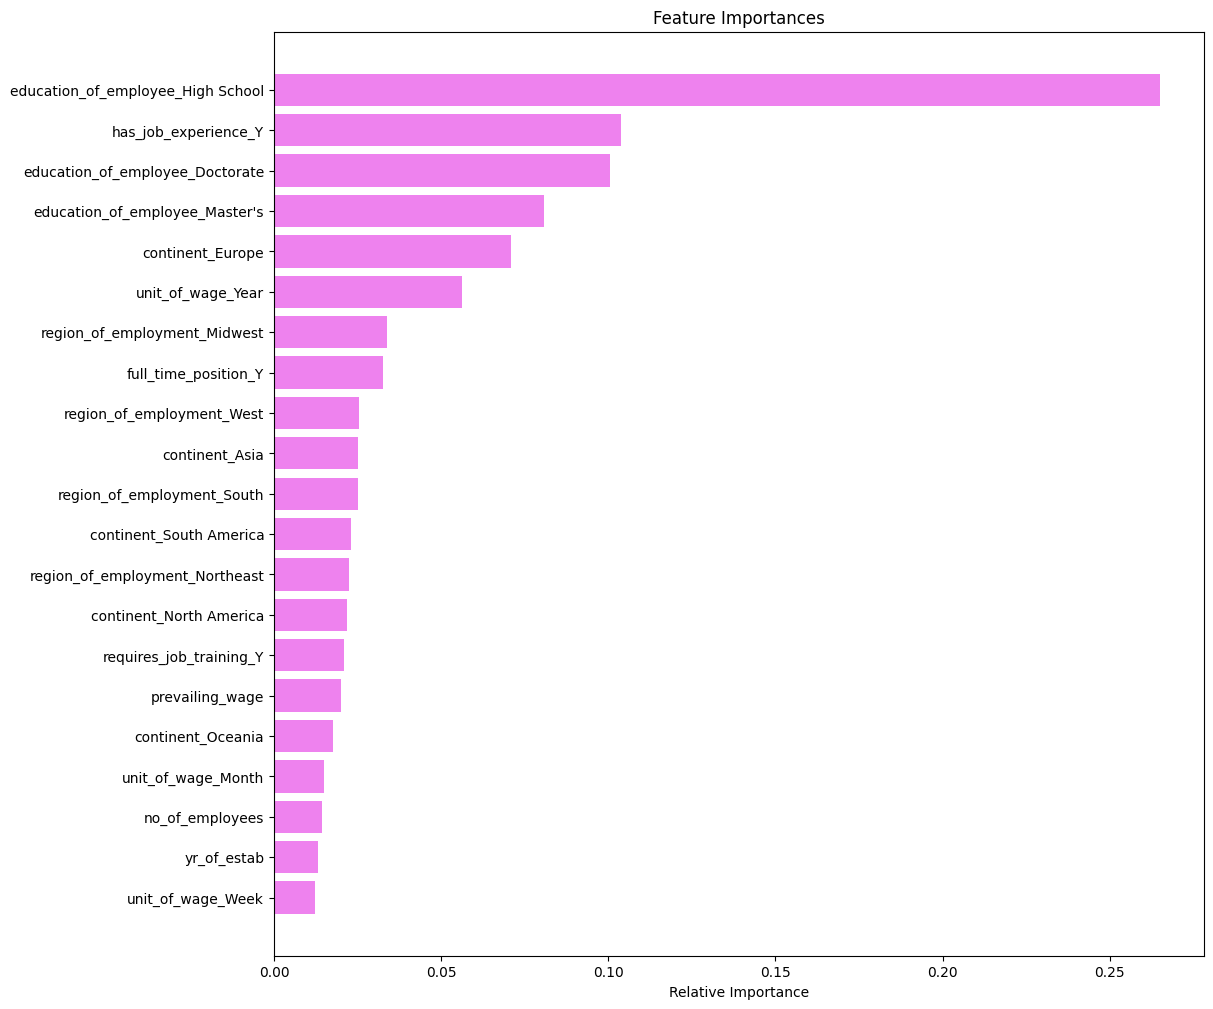

In [ ]:
# Checking the important features
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:
- There is not much difference in the model performance after hyperparameter tuning.
- The most important feature of this model is `education_of_employee`.

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator) ##to define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

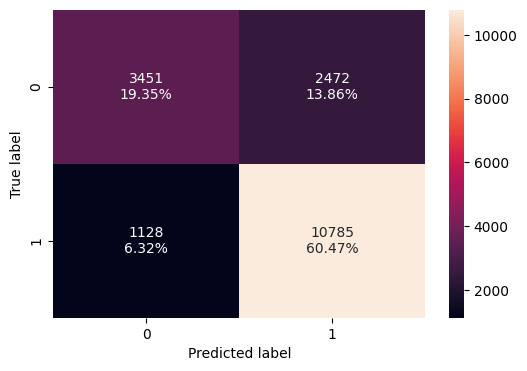

In [ ]:
# create confusion matrix for train data
confusion_matrix_sklearn(final_estimator,X_train,y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(final_estimator,X_train,y_train) ## check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.798161,0.905314,0.813532,0.856973


### Checking model performance on test set

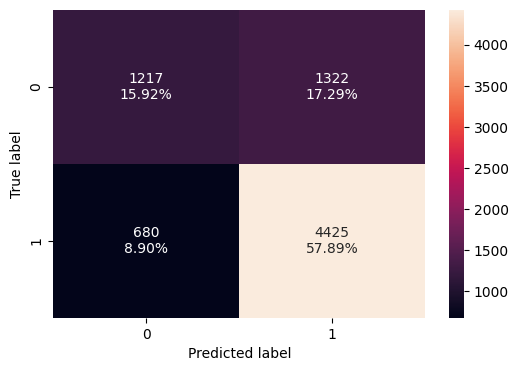

In [ ]:
# create confusion matrix for test data
confusion_matrix_sklearn(final_estimator,X_test,y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(final_estimator,X_test,y_test) ## check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.866797,0.769967,0.815518


Observations:
- The model's performance metrics after hyperparameter tuning are consistent with what has been observed with other models.
- It demonstrates strong generalization as evident from the `F1 score`s on both the training and testing sets, which are approximately 0.86 and 0.82, respectively.
- The model shows good capability in correctly identifying a majority of cases that should be certified.
- However, it seems to have some difficulty in correctly identifying cases that should be denied. Overall, the model's performance is balanced, and it is not exhibiting overfitting.
- The overall performance of the model is balanced, indicated by comparable performance metrics on the test and train sets, with no significant overfitting. The accuracy, recall, precision, and F1 score on the train set are also relatively high, indicating that the model is performing well on both the training and unseen test data.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.706567,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.798161,0.798161
Recall,1.0,0.930852,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.905314,0.905314
Precision,1.0,0.715447,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.813532,0.813532
F1,1.0,0.809058,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.856973,0.856973


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.738095,0.738095
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.866797,0.866797
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.769967,0.769967
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.815518,0.815518


Observations:

1. From the training performance comparison, we can observe that Decision Tree, Random Forest, and XGBoost classifiers achieved a perfect `accuracy` of 1.0 on the training set, suggesting potential overfitting. However, models like Tuned Decision Tree, Tuned Bagging Classifier, Tuned Random Forest, and Tuned Gradient Boost Classifier show more balanced performance with reasonable `accuracy`, `recall`, `precision`, and `F1 scores`.

2. Among the models that exhibit generalized performance on the testing dataset, XGBoost Classifier (Tuned) stands out with the highest `F1 score` of 0.815518. This model, along with other tuned models like Adaboost Classifier (Tuned) and Gradient Boost Classifier (Tuned), demonstrates consistent and competitive performance on the testing set.

3. The Stacking Classifier also shows promising performance with an `F1 score` of 0.815518 on the testing set, indicating that the combination of multiple models helps in achieving improved results.

- In conclusion, the models that demonstrate good generalization and competitive performance on the testing set are Tuned Decision Tree, Tuned Bagging Classifier, Tuned Random Forest, Tuned Adaboost Classifier, Tuned Gradient Boost Classifier, XGBoost Classifier (Tuned), and the Stacking Classifier. Among these, the XGBoost Classifier (Tuned) and the Stacking Classifier might be considered the top-performing models with the highest `F1 score` of 0.815518 on the testing set.

### Important features of the final model

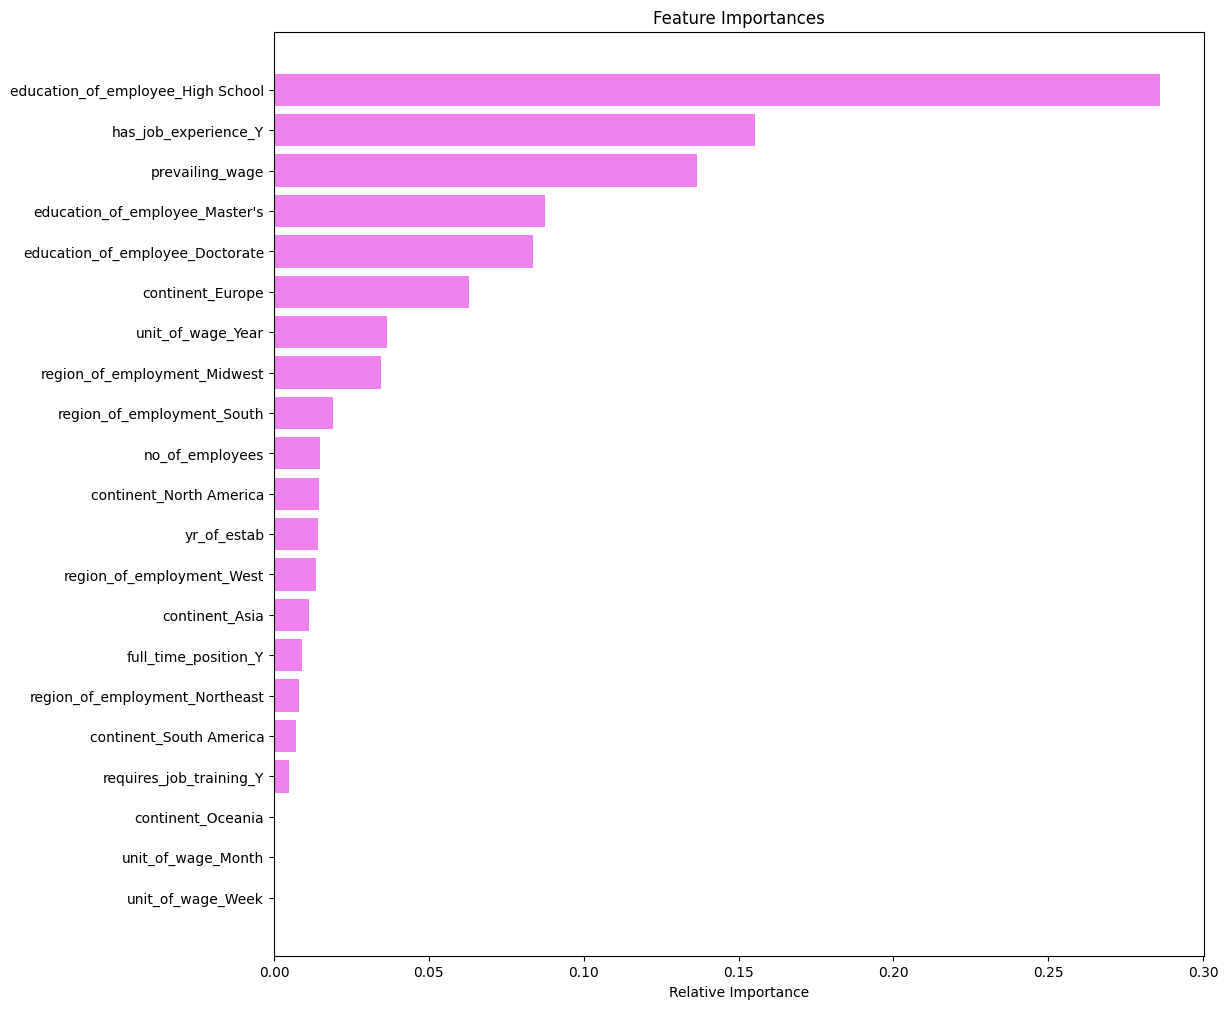

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- The results from the optimized model align with the observations made during the exploratory data analysis (EDA).
- The most influential attribute affecting visa approval is found to be the `education_of_employee`.
- Additionally, other significant attributes include `has_job_experience`, `unit_of_wage`,  `continent` and `region_of_employment`.
- These findings reinforce the importance of these factors in determining the outcome of visa approval and validate the insights gained from the initial data exploration.

## Actionable Insights and Recommendations

Insights:

Based on the insights gained from the EDA and the XGBoost (tuned) model, several important features have been identified that influence visa approvals:

1. Education of employee: Applicants with higher education levels, such as doctorate and masters degrees, have better chances of getting certified, while those with only a high school degree are more likely to be denied.

2. Job experience: Employees with prior job experience have higher chances of getting certified compared to those without any work experience.

3. Continent of the employee: Applicants from Europe have greater chances of getting certified compared to other continents.

4. Prevailing wage and unit of wage: Higher prevailing wages, especially when expressed in years, are associated with higher approval rates.

5. Region of employment: Applicants intending to work in the Midwest or South regions have higher chances of being certified compared to other regions.

6. Number of employees: Companies with a larger number of employees are more likely to get their visa applications approved.

However, factors like job training requirements, year of establishment, and full-time or part-time employment have minimal impact on the visa approval process.

Recommendations:

1. Prioritize screening: The OFLC can prioritize visa applications from employees who are from Europe, possess higher degrees, have job experience, and intend to work in the Midwest or South regions, especially if the employer has a larger workforce and uses years as the pay unit.

2. Encourage employers: Encourage employers to adjust their job requirements and attract candidates who possess the important features that lead to higher chances of visa approval.

3. Implement specialized worker programs: Implement programs that specifically target talent based on the identified important features. Such programs can streamline the visa approval process for both employers and employees.

4. Point system: Introduce a point-based system to quantify applicants based on the identified important features. This system can prioritize applicants with higher points during the screening process.

By implementing these recommendations, the OFLC can make the visa screening process more efficient and effective, while also ensuring that the selection process aligns with the attributes that have a significant impact on visa approvals.